In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn.metrics import pairwise_distances

from sklearn import metrics
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 20, 'linewidths': 3}

In [89]:
data = np.load('./data/data.npy')

In [90]:
# Basic properties
print("Shape:", data.shape)
print("Data Type:", data.dtype)
print("Size:", data.size)
print("Item Size:", data.itemsize)
print("Number of Dimensions:", data.ndim)

# Statistical measures
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Standard Deviation:", np.std(data))
print("Variance:", np.var(data))
print("Min:", np.min(data))
print("Max:", np.max(data))
print("Sum:", np.sum(data))

Shape: (400, 2)
Data Type: float64
Size: 800
Item Size: 8
Number of Dimensions: 2
Mean: 0.806870570212376
Median: 0.7838505080639541
Standard Deviation: 0.9792923654384463
Variance: 0.9590135370060275
Min: -1.118993655640819
Max: 2.916550459246887
Sum: 645.4964561699007


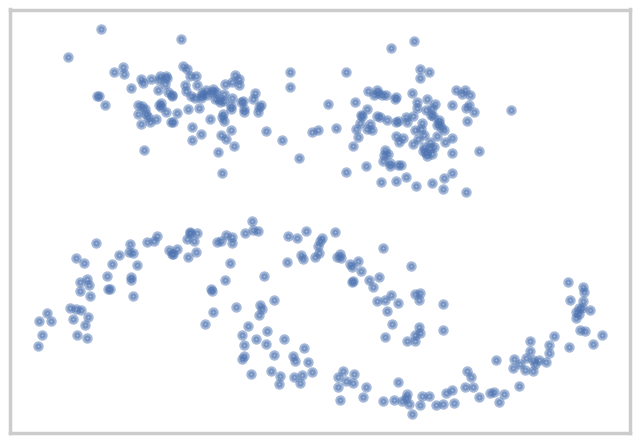

In [91]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [92]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

# K-Means

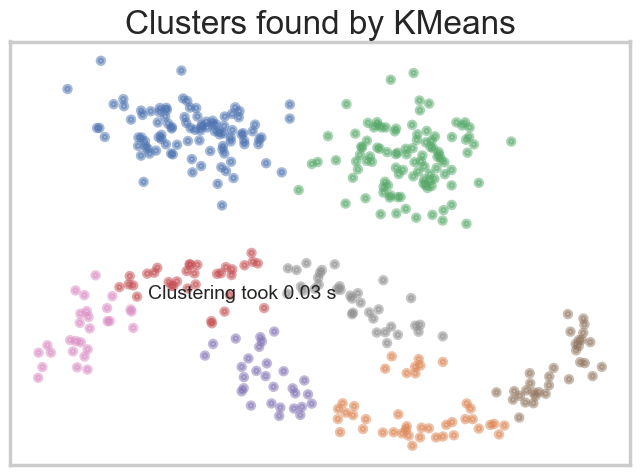

In [93]:
import warnings

warnings.filterwarnings('ignore')
plot_clusters(data, cluster.KMeans, (), {})

# DBSCAN

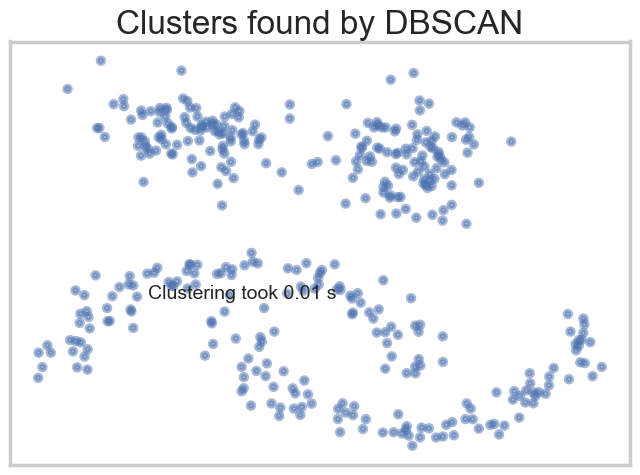

In [94]:
plot_clusters(data, cluster.DBSCAN, (), {})

# Birch

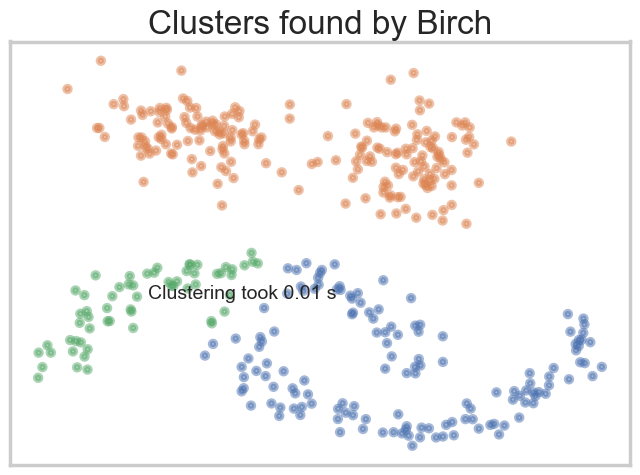

In [95]:
plot_clusters(data, cluster.Birch, (), {})

# OPTICS

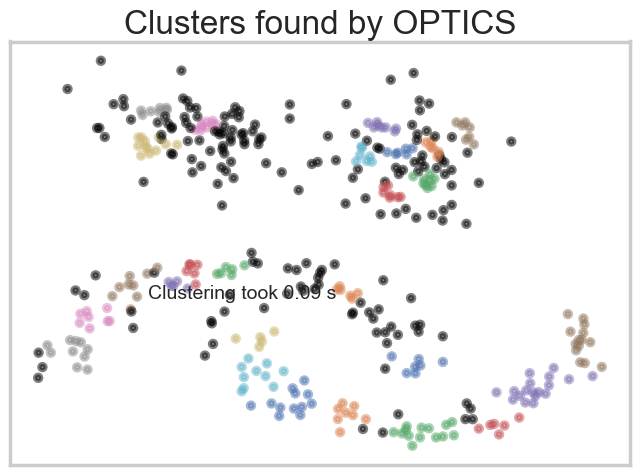

In [96]:
plot_clusters(data, cluster.OPTICS, (), {})

# Affinity Propagation

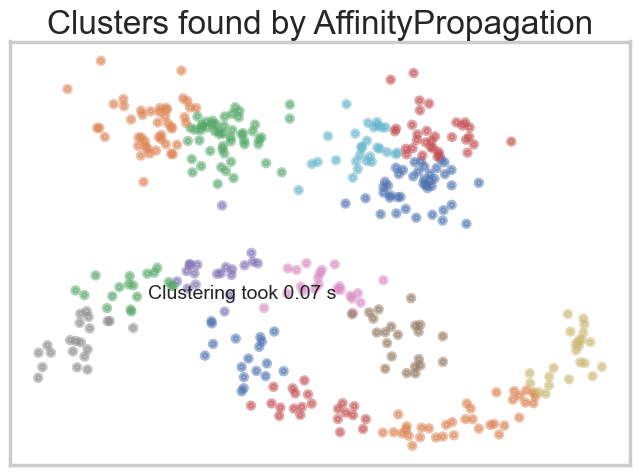

In [97]:
plot_clusters(data, cluster.AffinityPropagation, (), {})

# HDBSCAN

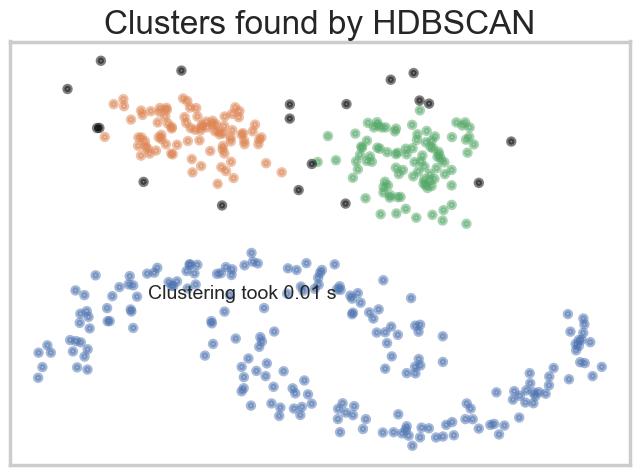

In [98]:
plot_clusters(data, cluster.HDBSCAN, (), {})

# Agglomerative Clustering

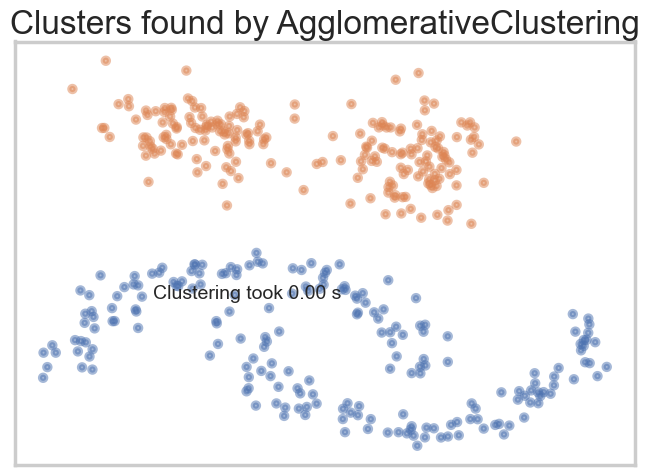

In [99]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {})

# Spectral Clustering

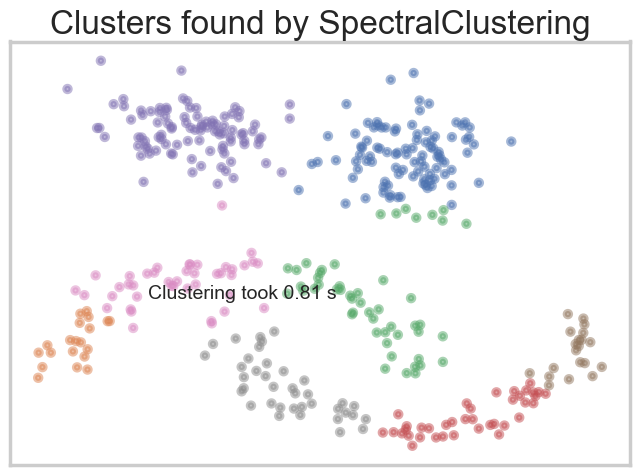

In [100]:
plot_clusters(data, cluster.SpectralClustering, (), {})

# ---------------------------------------------------- TASK 3 ---------------------------------------------

# =========== K-Means combinations ===========

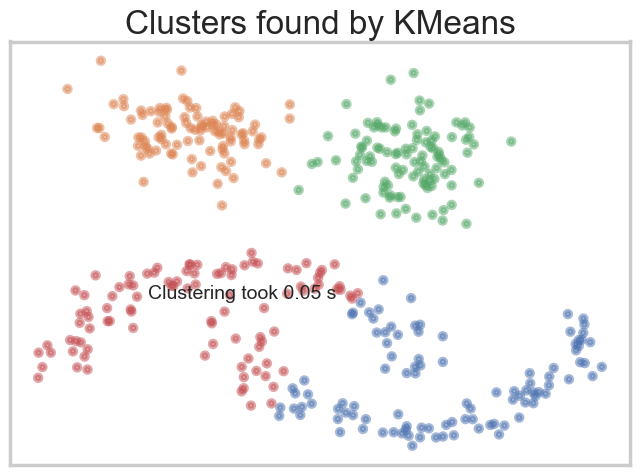

In [101]:
kMeansParams_1 = {
    'n_clusters': 4,
    'init': 'k-means++',
    'random_state': 5,
    'max_iter': 400,
    'n_init': 2
}

plot_clusters(data, cluster.KMeans, (), kMeansParams_1)

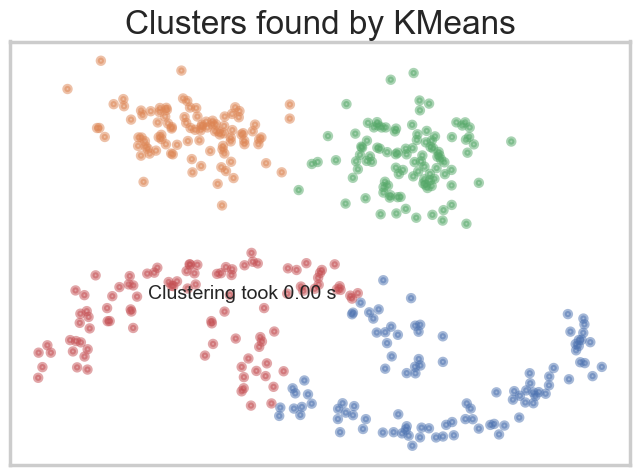

In [102]:
kMeansParams_2 = {
    'n_clusters': 4,
    'init': 'k-means++',
    'random_state': 5,
    'max_iter': 300,
    'n_init': 2
}

plot_clusters(data, cluster.KMeans, (), kMeansParams_2)

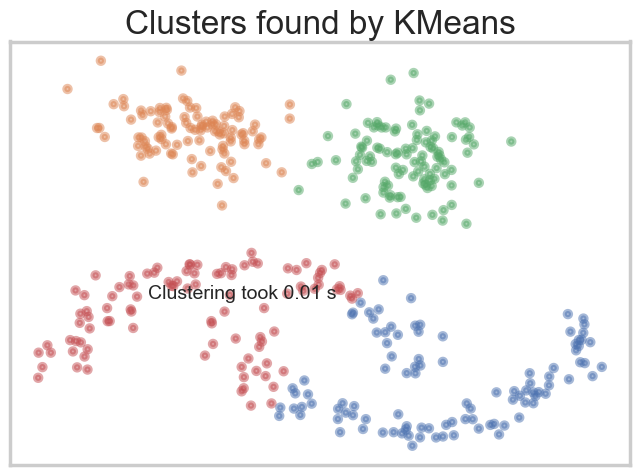

In [103]:
kMeansParams_3 = {
    'n_clusters': 4,
    'init': 'k-means++',
    'random_state': 5,
    'max_iter': 300,
    'n_init': 3
}

plot_clusters(data, cluster.KMeans, (), kMeansParams_3)

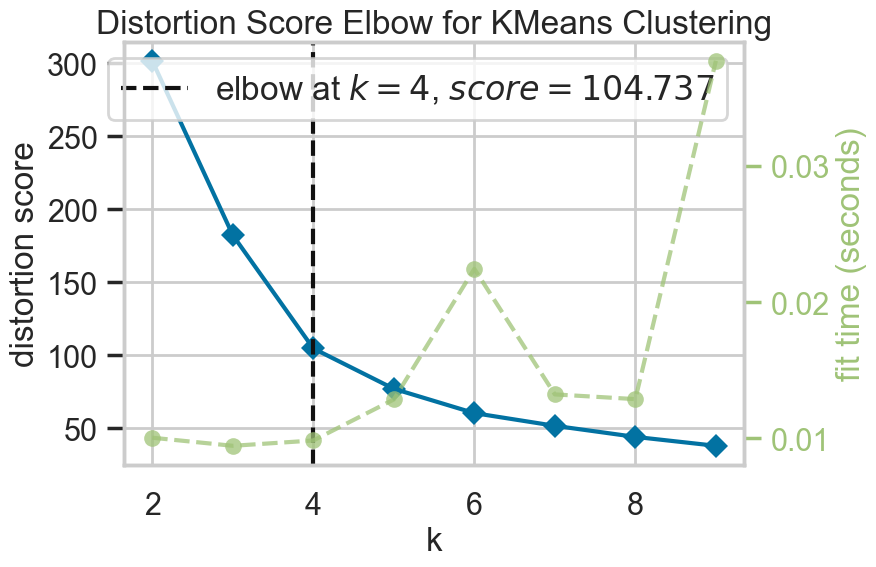

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
kmeans = cluster.KMeans()
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(data)
visualizer.show()

K-means gave the stable output for all given combinations

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assume X is your data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=300, n_init=3)
kmeans.fit(data)

# Intra-cluster distances
intra_distances = [np.mean(np.min(pairwise_distances(data[kmeans.labels_ == i], [kmeans.cluster_centers_[i]]), axis=1)) for i in range(kmeans.n_clusters)]

# Inter-cluster distances
inter_distances = pairwise_distances(kmeans.cluster_centers_)

# Processing the inter-cluster distances as needed
# For example, finding the minimum distance between any two clusters
min_inter_distance = np.min(inter_distances[np.nonzero(inter_distances)])


print("intra_distances", intra_distances)
print("inter_distances", inter_distances)

intra_distances [0.6058984412958582, 0.2969262412514473, 0.3232391765668205, 0.5873192441338919]
inter_distances [[0.         2.73820451 2.09425372 1.54540469]
 [2.73820451 0.         1.24613042 1.67624404]
 [2.09425372 1.24613042 0.         1.85507818]
 [1.54540469 1.67624404 1.85507818 0.        ]]


# ============== Affinity Propagation ===============

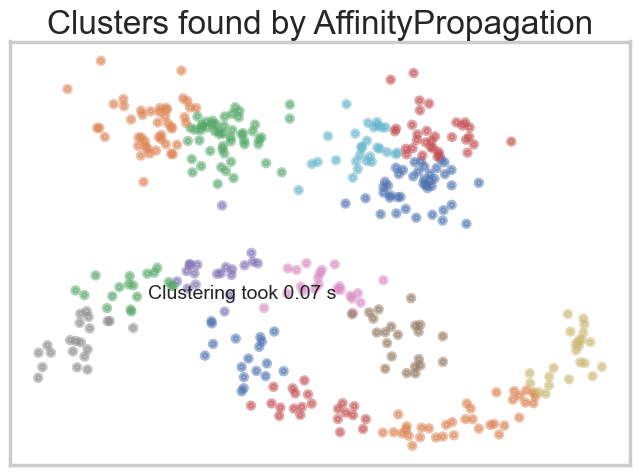

In [106]:
AffinityPropagationParams_1 = {
    'convergence_iter': 10,
    'damping': 0.5,
    'max_iter': 200,
    'copy': True
}

plot_clusters(data, cluster.AffinityPropagation, (), AffinityPropagationParams_1)

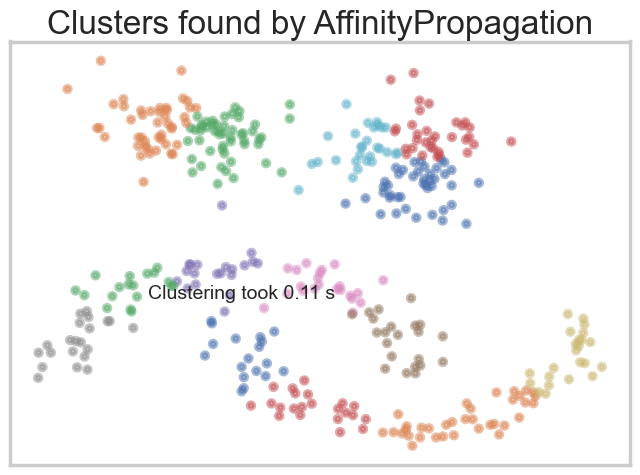

In [107]:
AffinityPropagationParams_2 = {
    'convergence_iter': 50,
    'damping': 0.5,
    'max_iter': 200,
    'copy': True
}

plot_clusters(data, cluster.AffinityPropagation, (), AffinityPropagationParams_2)

In [108]:
affinityPropagationParams = {
    'AffinityPropagation-1': cluster.AffinityPropagation(convergence_iter=50, damping=0.5, max_iter=200, copy=True),
    'AffinityPropagation-2': cluster.AffinityPropagation(convergence_iter=50, damping=0.60, max_iter=200, copy=True),
    'AffinityPropagation-3': cluster.AffinityPropagation(convergence_iter=100, damping=0.75, max_iter=500, copy=True),
}

# Dictionary to store silhouette scores
silhouette_scores = {}

for name, algorithm in affinityPropagationParams.items():
    # Fit and predict clusters
    labels = algorithm.fit_predict(data)
    if len(set(labels)) > 1:
        silhouette_score = metrics.silhouette_score(data, labels)
        silhouette_scores[name] = silhouette_score

# Print the silhouette scores
print(silhouette_scores)

{'AffinityPropagation-1': 0.41210693616596566, 'AffinityPropagation-2': 0.4136826903350038, 'AffinityPropagation-3': 0.4243090954184359}


# ============== DBSCAN ===============

In [109]:
dbscanParams = {
    'DBSCAN-1': cluster.DBSCAN(eps=0.15, min_samples=5, leaf_size=30, metric='euclidean'),
    'DBSCAN-2': cluster.DBSCAN(eps=0.25, min_samples=15, leaf_size=30, metric='euclidean'),
    'DBSCAN-3': cluster.DBSCAN(eps=0.35, min_samples=25, leaf_size=30, metric='euclidean'),
}

# Dictionary to store silhouette scores
silhouette_scores = {}

for name, algorithm in dbscanParams.items():
    # Fit and predict clusters
    labels = algorithm.fit_predict(data)
    if len(set(labels)) > 1:
        silhouette_score = metrics.silhouette_score(data, labels)
        silhouette_scores[name] = silhouette_score

# Print the silhouette scores
print(silhouette_scores)

{'DBSCAN-1': 0.3291085015526325, 'DBSCAN-2': 0.41326592531674694, 'DBSCAN-3': 0.32476646711048035}


Hence DBSCAN-2 having best parameters. Lets visualise it. 

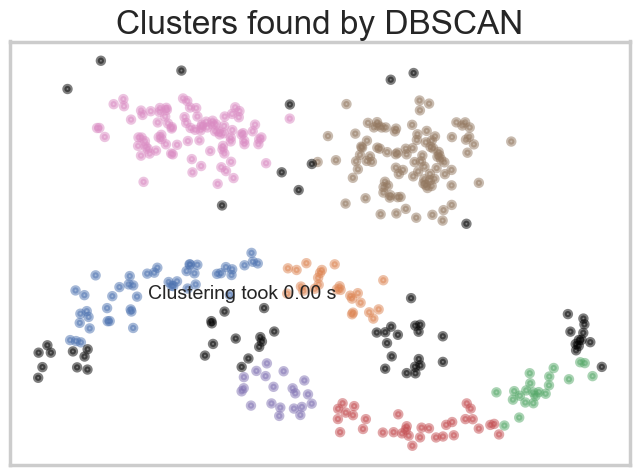

In [110]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.25, 'min_samples':15, 'leaf_size':30, 'metric':'euclidean'})

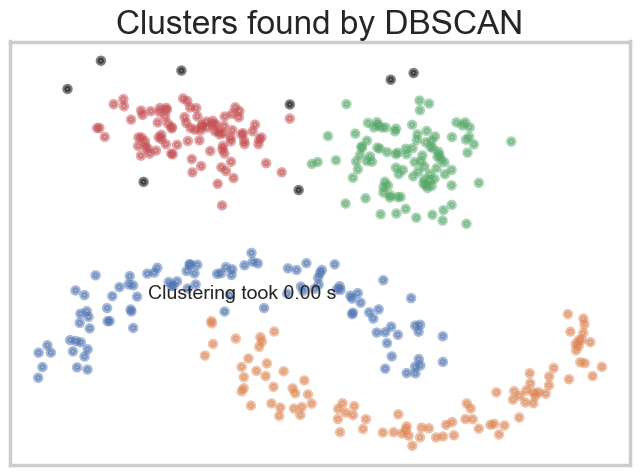

In [111]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.22, 'metric':'euclidean'})

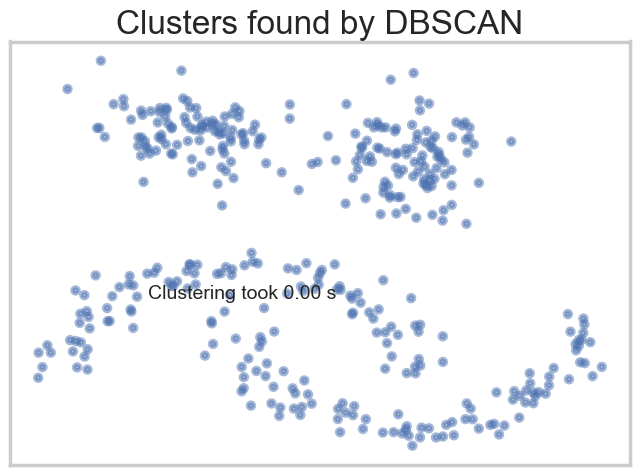

In [112]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.50, 'min_samples':15, 'leaf_size':30, 'metric':'euclidean'})

# ============== BIRCH ===============

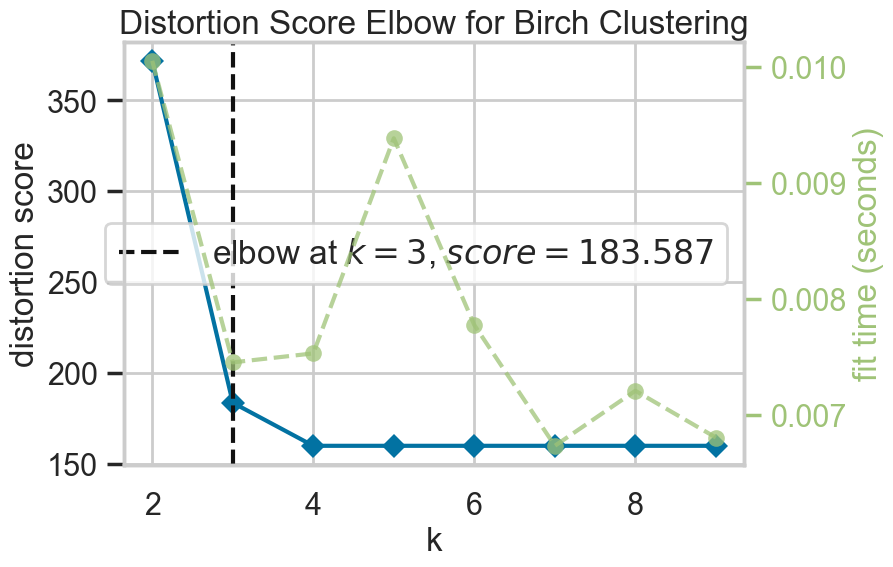

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
birch = cluster.Birch(branching_factor=2, threshold=0.8)
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(birch, k=(2, 10))
visualizer.fit(data)
visualizer.show()

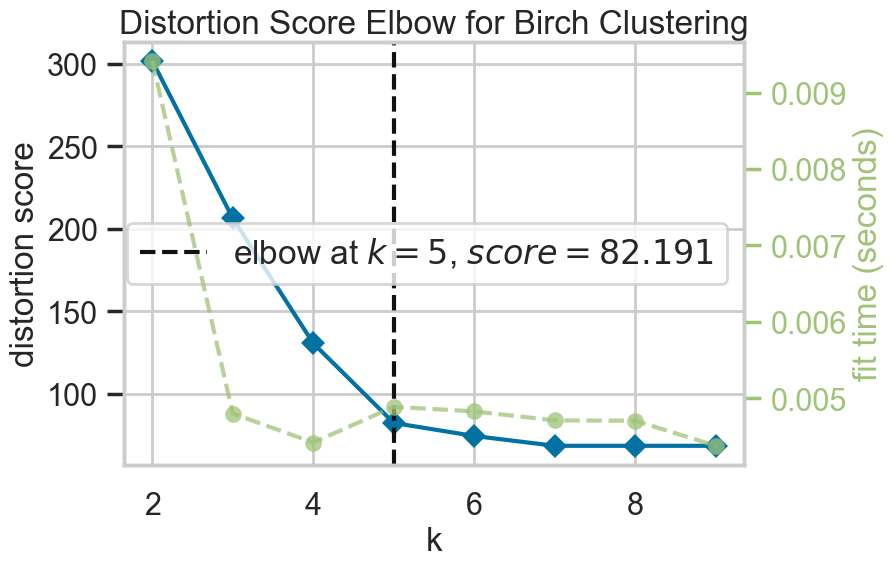

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
birch = cluster.Birch(branching_factor=3, threshold=0.70)
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(birch, k=(2, 10))
visualizer.fit(data)
visualizer.show()

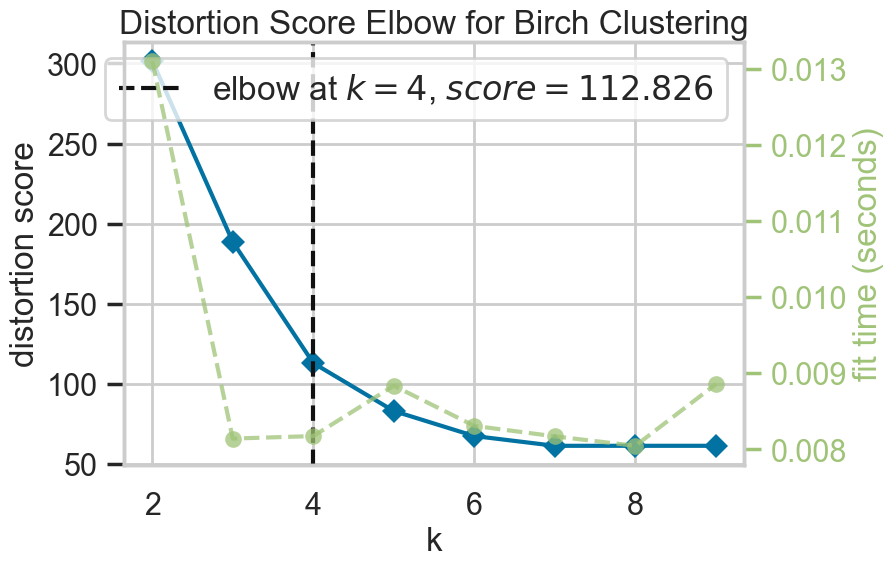

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
birch = cluster.Birch(branching_factor=2, threshold=0.70)
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(birch, k=(2, 10))
visualizer.fit(data)
visualizer.show()

## Yey ! we got it 

In [116]:
birchParams = {
    'birch-1': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.5),
    'birch-2': cluster.Birch(n_clusters=4, branching_factor=3, threshold=0.5),
    'birch-3': cluster.Birch(n_clusters=4, branching_factor=4, threshold=0.5),
    'birch-4': cluster.Birch(n_clusters=4, branching_factor=5, threshold=0.5),

    'birch-5': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.60),
    'birch-6': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.70),
    'birch-7': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.80),
    'birch-8': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.90),

    # variations 
    'birch-9': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.15),
    'birch-10': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.20),
    'birch-11': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.10),

}

# Dictionary to store silhouette scores
silhouette_scores = {}

for name, algorithm in birchParams.items():
    # Fit and predict clusters
    labels = algorithm.fit_predict(data)
    if len(set(labels)) > 1:
        silhouette_score = metrics.silhouette_score(data, labels)
        silhouette_scores[name] = silhouette_score

# Print the silhouette scores
print(silhouette_scores)

{'birch-1': 0.4108733038895053, 'birch-2': 0.5425496671528074, 'birch-3': 0.45722139457850397, 'birch-4': 0.45752775051042577, 'birch-5': 0.545450512287394, 'birch-6': 0.5333074413312658, 'birch-7': 0.44232645139080945, 'birch-8': 0.48525138166633125, 'birch-9': 0.47651327954699824, 'birch-10': 0.46724275968190215, 'birch-11': 0.538228769125305}


'birch-5': cluster.Birch(n_clusters=4, branching_factor=2, threshold=0.60) is the best, lets visualise

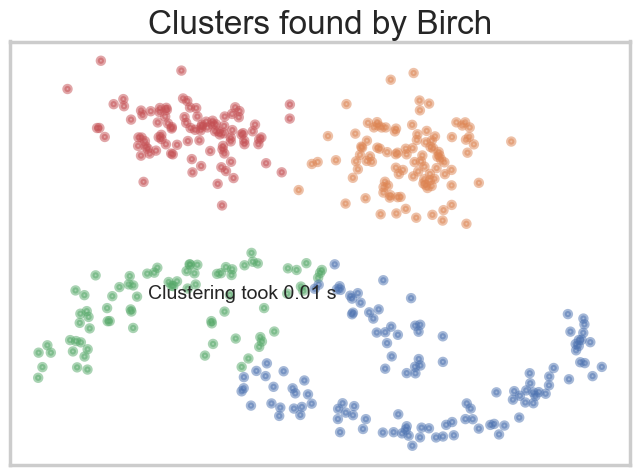

In [117]:
plot_clusters(data, cluster.Birch, (), {'n_clusters':4, 'branching_factor':2, 'threshold':0.60})

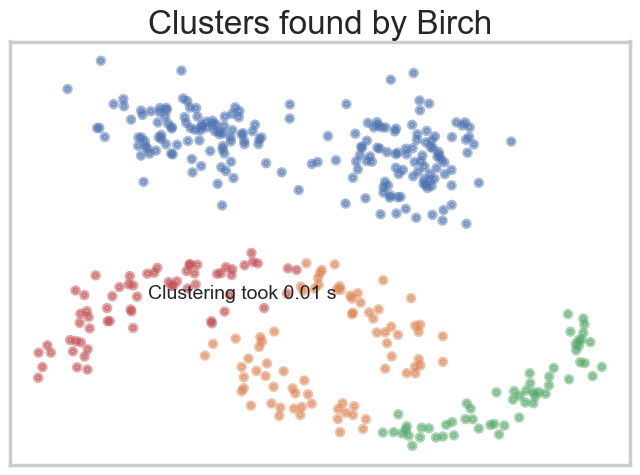

In [118]:
plot_clusters(data, cluster.Birch, (), {'n_clusters':4, 'branching_factor':4, 'threshold':0.50})

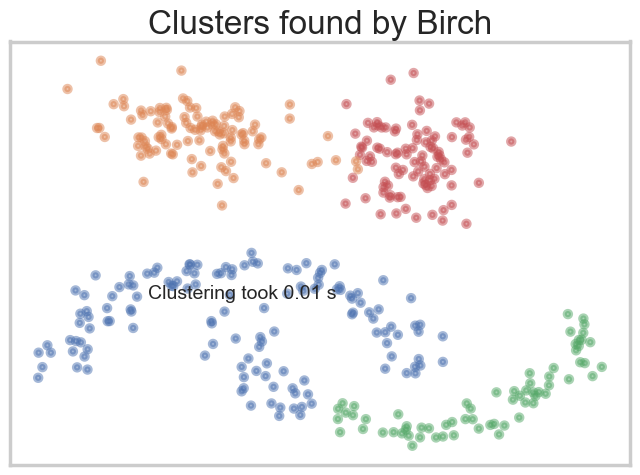

In [119]:
plot_clusters(data, cluster.Birch, (), {'n_clusters':4, 'threshold':0.15})

# ============== OPTICS ===============

In [120]:
dbscanParams = {
    'OPTICS-1': cluster.OPTICS(min_samples=3, metric='manhattan'),
    'OPTICS-2': cluster.OPTICS(min_samples=4, metric='manhattan'),
    'OPTICS-3': cluster.OPTICS(min_samples=5, metric='manhattan'),
    'OPTICS-4': cluster.OPTICS(min_samples=10, metric='cosine'),
    'OPTICS-5': cluster.OPTICS(min_samples=15, metric='cosine'),
    'OPTICS-6': cluster.OPTICS(min_samples=20, metric='cosine'),
    'OPTICS-7': cluster.OPTICS(min_samples=25, metric='cosine'),
    'OPTICS-8': cluster.OPTICS(min_samples=30, metric='cosine'),
    'OPTICS-9': cluster.OPTICS(min_samples=35, metric='cosine'),
    'OPTICS-10': cluster.OPTICS(min_samples=40, metric='manhattan'),
    'OPTICS-11': cluster.OPTICS(min_samples=45, metric='manhattan'),
}

# Dictionary to store silhouette scores
silhouette_scores = {}

for name, algorithm in dbscanParams.items():
    # Fit and predict clusters
    labels = algorithm.fit_predict(data)
    if len(set(labels)) > 1:
        silhouette_score = metrics.silhouette_score(data, labels)
        silhouette_scores[name] = silhouette_score

# Print the silhouette scores
print(silhouette_scores)

{'OPTICS-1': 0.11165452848955897, 'OPTICS-2': -0.018972579850307206, 'OPTICS-3': -0.048382156428316773, 'OPTICS-4': -0.26895339133357726, 'OPTICS-5': -0.07879226547824042, 'OPTICS-6': -0.0690786899968026, 'OPTICS-7': 0.074258014065745, 'OPTICS-8': 0.1131871531685098, 'OPTICS-9': 0.2267276699983086, 'OPTICS-10': 0.4400872032017384, 'OPTICS-11': 0.46519443384625603}


'OPTICS-11' has the best score

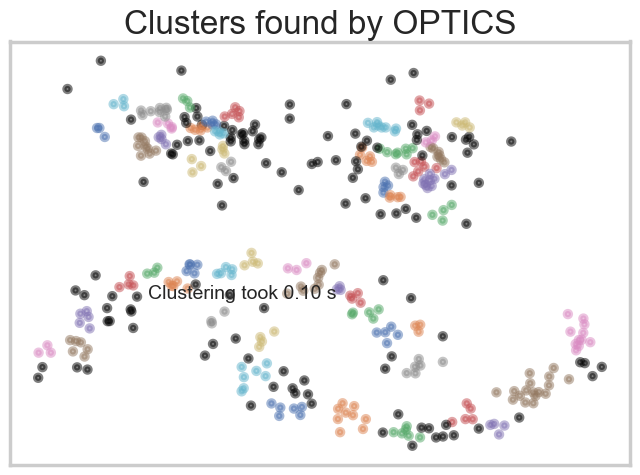

In [121]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 3, 'metric': 'manhattan' })

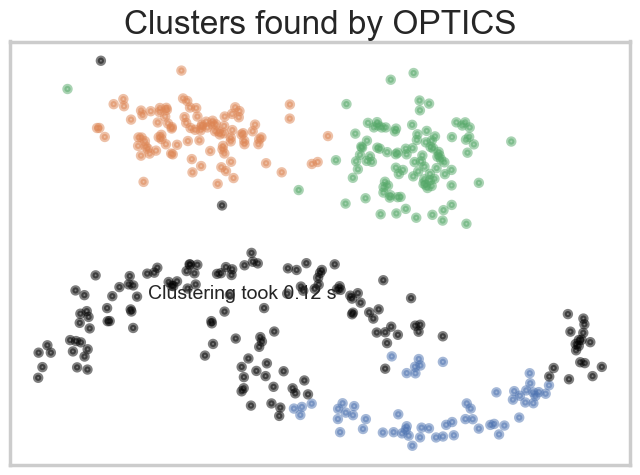

In [122]:
# Plotting OPTICS-11': cluster.OPTICS(min_samples=45, metric='manhattan') for the score of 0.4651
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 40, 'metric': 'manhattan'})

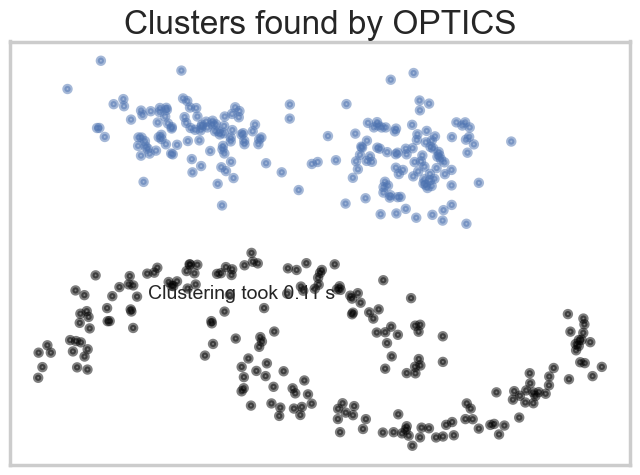

In [123]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 90, 'metric': 'manhattan'})

# ============== HDBSCAN ===============

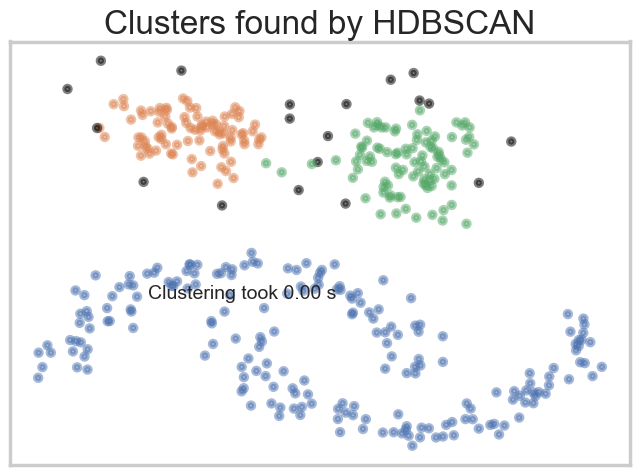

In [124]:
plot_clusters(data, cluster.HDBSCAN, (), {'min_cluster_size': 4, 'metric': 'euclidean', 'allow_single_cluster': False })

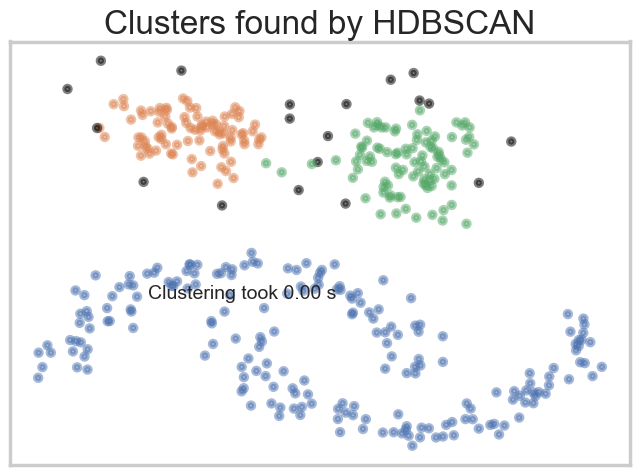

In [125]:
plot_clusters(data, cluster.HDBSCAN, (), {'min_cluster_size': 4, 'metric': 'euclidean', 'allow_single_cluster': True })

# ============== Agglomerative Clustering ===============

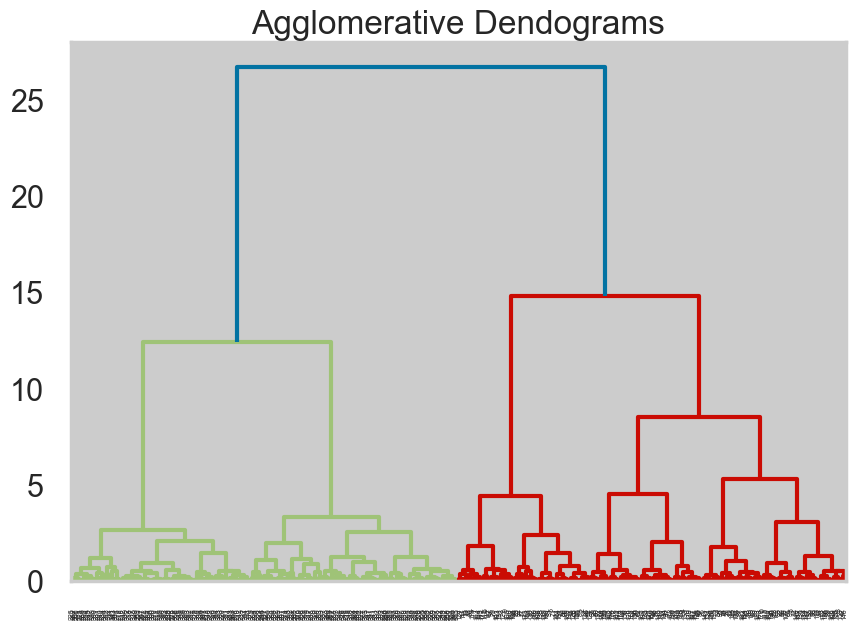

In [126]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Agglomerative Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

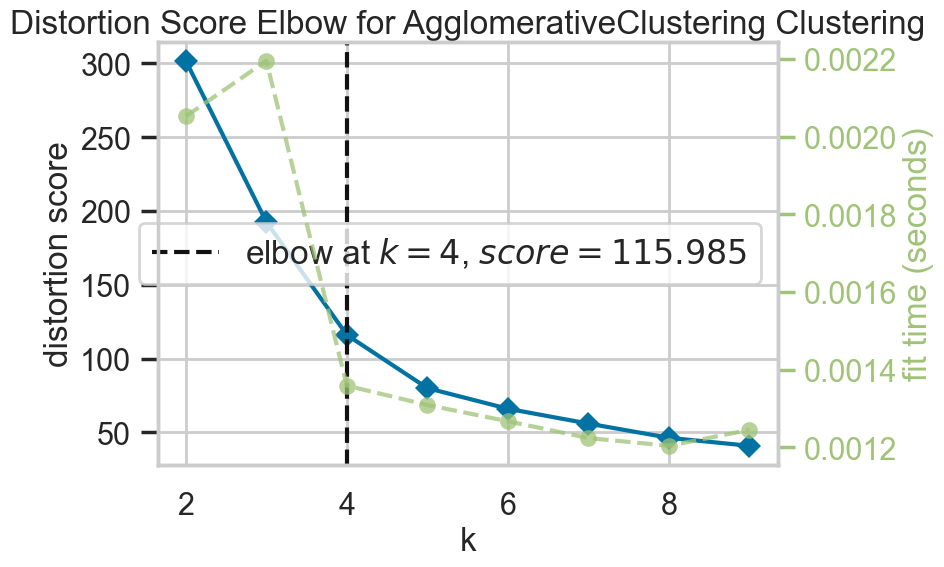

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
agglomerativeClustering = cluster.AgglomerativeClustering(affinity='euclidean', linkage='ward')
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(agglomerativeClustering, k=(2, 10))
visualizer.fit(data)
visualizer.show()

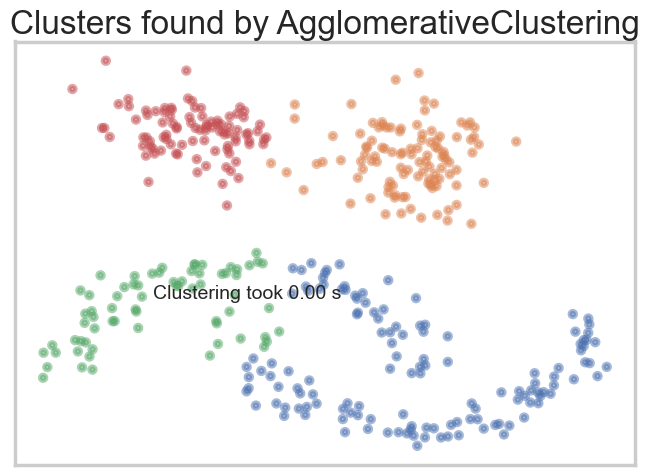

In [128]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters': 4, 'affinity': 'euclidean', 'linkage': 'ward', 'compute_full_tree': True})

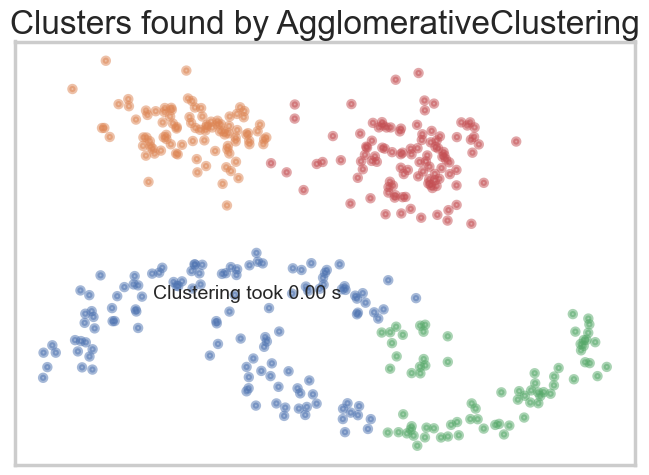

In [129]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters': 4, 'linkage': 'complete', 'compute_full_tree': True})

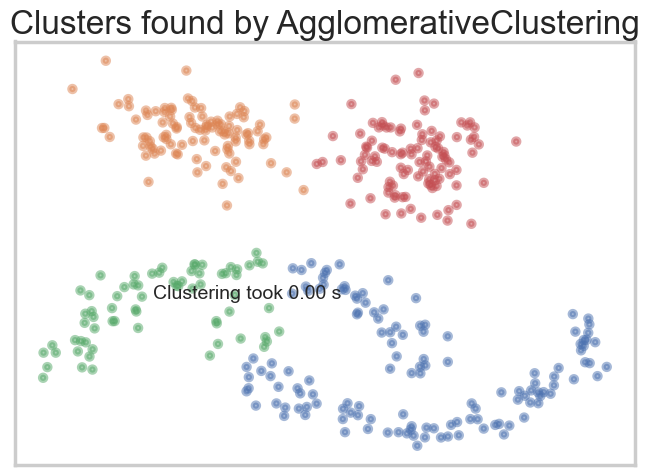

In [130]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters': 4, 'linkage': 'average', 'compute_full_tree': True})

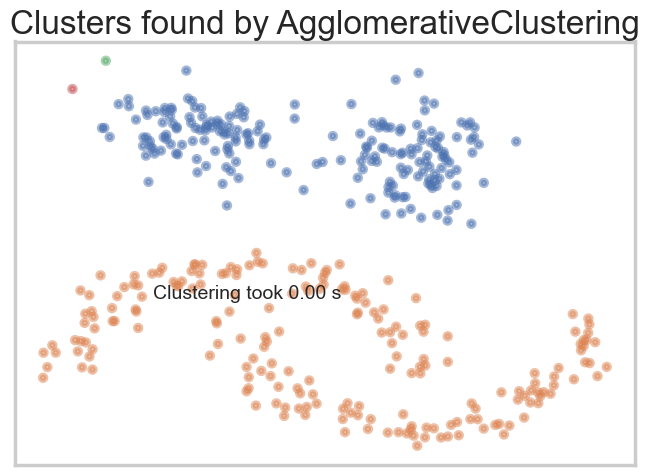

In [131]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters': 4, 'linkage': 'single', 'compute_full_tree': True})

# ============== Spectral Clustering =============== 

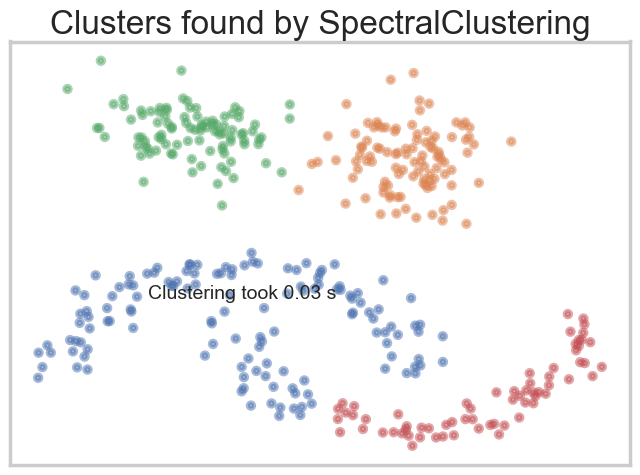

In [132]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack'})

# This is the best so far, satisfying intra-inter cluster distances. 

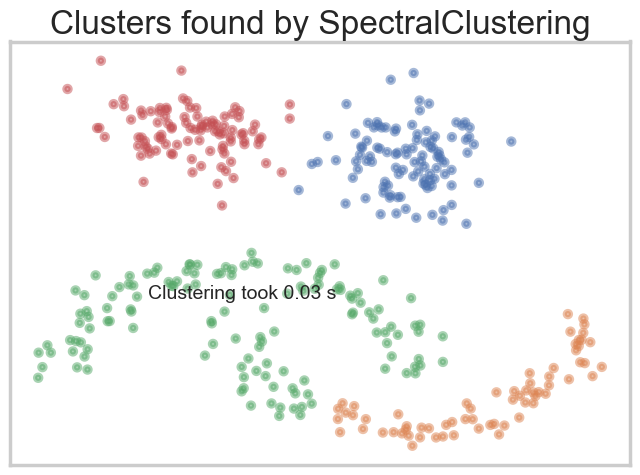

In [133]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack'})

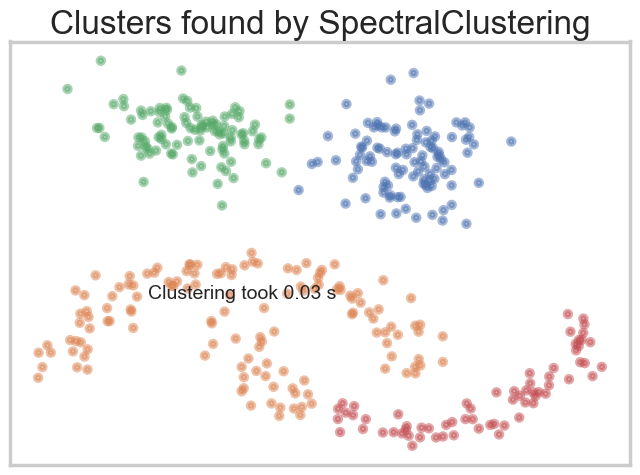

In [134]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'affinity': 'nearest_neighbors', 'eigen_solver': 'lobpcg'})   

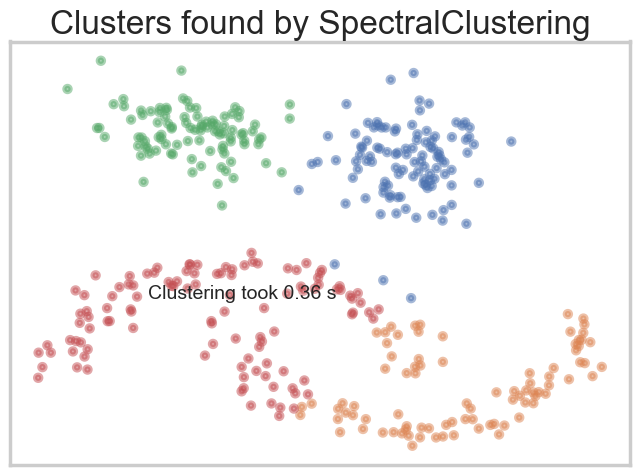

In [135]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'affinity': 'rbf', 'eigen_solver': 'lobpcg'})